In [7]:
from datetime import datetime
from pytides.tide import Tide
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [14]:
fname = 'data/FernandinaBeach.csv'

##Prepare our tide data
station_id = 'Fernandina Beach'

columns = ['time', 'data']
heights = []
t = []
data = pd.read_csv(fname, header=None, names=columns)

for x in data.time:
    if (x != 'time'):
        datetime_object = datetime.strptime(x, '%x  %H:%M')
        t.append(datetime_object)

for y in data.data:
    if (y != 'data'):
        heights.append(float(y))

In [36]:
##Prepare a list of datetimes, each 6 minutes apart, for 10 days.
prediction_t0 = datetime(2016,10,1,0,0)
hours = 0.1*np.arange(10 * 24 * 10)
times = Tide._times(prediction_t0, hours)

##Fit the tidal data to the harmonic model using Pytides
my_tide = Tide.decompose(heights, t)

##Predict the tides using the Pytides model.
my_prediction = my_tide.at(times)

fnameOutput = 'data/outputPytide.csv'
d = np.vstack([my_prediction]).T
np.savetxt(fnameOutput,d)

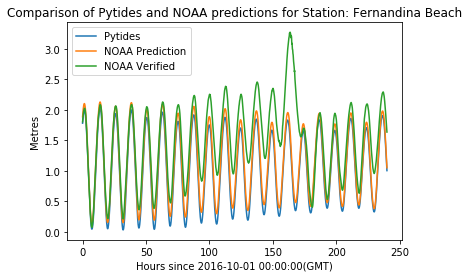

In [37]:
##Prepare NOAA's results
noaa_verified = []
noaa_predicted = []

column = ['time', 'prediction', 'verified']
fname1 = 'data/FernandinaBeach_noaa.csv'
result = pd.read_csv(fname1, header=None, names=column)
for x in result.prediction:
    if (x != 'prediction'):
        noaa_predicted.append(float(x))
for y in result.verified:
    if (y != 'verified'):
        noaa_verified.append(float(y))

#print noaa_predicted

##Plot the results
plt.plot(hours, my_prediction, label="Pytides")
plt.plot(hours, noaa_predicted, label="NOAA Prediction")
plt.plot(hours, noaa_verified, label="NOAA Verified")
plt.legend()
plt.title('Comparison of Pytides and NOAA predictions for Station: ' + str(station_id))
plt.xlabel('Hours since ' + str(prediction_t0) + '(GMT)')
plt.ylabel('Metres')

plt.show()